In [1]:
import pandas as pd
df = pd.read_csv('../data/forestfires.csv')

In [2]:
print(df.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [3]:
def avg_temp(month):
    total = 0
    for element in month:
        total += df.loc[element]['temp']
    print(total/len(month), "average temperature in C")

In [4]:
def avg_wind(month):
    total = 0
    for element in month:
        total += df.loc[element]['wind']
    print(total/len(month), "average wind in kl/hour")

In [5]:
months = ["sep", "oct", "nov", "dec", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug"]
data = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in df.index:
    month = df.loc[i]['month']
    data[months.index(month)] += [i]

In [7]:
avg_temp(data[months.index(input('month'))])

monthsep
19.61220930232558 average temperature in C


In [8]:
avg_wind(data[months.index(input('month'))])

monthsep
3.5575581395348848 average wind in kl/hour


In [8]:
xvals = []
yvals = []
for element in data[months.index('sep')]:
    xvals += [df.loc[element]['X']] 
    yvals += [df.loc[element]['Y']]

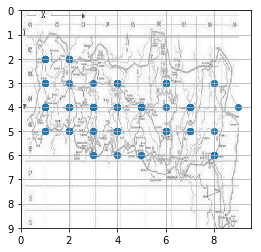

In [16]:
import matplotlib.pyplot as plt
img = plt.imread("maptest.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, 9, 9, 0])
ax.scatter(df.loc[data[months.index('sep')]]['X'], df.loc[data[months.index('sep')]]['Y'])
ax.grid(True)

this is a very rough mapping of the forest fires in Septemeber using the X, Y cordinates in the data overlayed with a map of the park. I want to find a way of acurately lining up the image of the map with the data because right now it is a little off, as you can see when the ax.grid is set to True the lines are a little off.

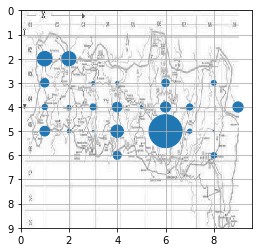

In [15]:
import matplotlib.pyplot as plt
img = plt.imread("maptest.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, 9, 9, 0])
ax.scatter(df.loc[data[months.index('sep')]]['X'], df.loc[data[months.index('sep')]]['Y'], s= df.loc[data[months.index('sep')]]['area'])
ax.grid(True)

this is the same graph but roughly with area determining size of point. I just made the size variable in ax.scatter equal to the area data coulumn for that point in September.

In [178]:
df.loc[238]

X              6
Y              5
month        sep
day          sat
FFMC        92.5
DMC        121.1
DC         674.4
ISI          8.6
temp        25.1
RH            27
wind           4
rain           0
area     1090.84
Name: 238, dtype: object

In [145]:
df.loc[data[months.index('sep')]]['area']

8       0.00
9       0.00
10      0.00
11      0.00
13      0.00
14      0.00
15      0.00
20      0.00
21      0.00
26      0.00
27      0.00
28      0.00
29      0.00
30      0.00
31      0.00
32      0.00
33      0.00
34      0.00
35      0.00
43      0.00
44      0.00
45      0.00
46      0.00
50      0.00
55      0.00
56      0.00
66      0.00
67      0.00
68      0.00
71      0.00
       ...  
358     0.00
359     8.12
360     1.09
361     3.94
362     0.52
363     2.93
364     5.65
365    20.03
366     1.75
367     0.00
368    12.64
369     0.00
370    11.06
374    18.30
375    39.35
386    24.59
391    30.18
392    70.76
396     3.64
401     4.95
404     6.04
406     3.95
408     7.80
423     0.72
430     0.00
439     0.33
440     0.00
444     9.96
448     0.00
462     3.71
Name: area, Length: 172, dtype: float64

In [153]:
len(data[months.index('sep')])

172

In [154]:
len(data[months.index('aug')])

184

In [162]:
for element in months:
    print(len(data[months.index(element)]), element)

172 sep
15 oct
1 nov
9 dec
2 jan
20 feb
54 mar
9 apr
2 may
17 jun
32 jul
184 aug


In [199]:
for element in data[months.index('sep')]:
    if df.loc[element]['area'] > 0:
        print(element, df.loc[element]['area'], df.loc[element]['DMC'])

139 0.43 129.5
140 0.47 126.5
147 0.96 73.4
149 1.12 80.9
153 1.46 85.1
154 1.46 145.4
156 1.61 145.4
159 1.69 117.9
163 1.95 121.1
164 2.01 90.0
170 2.57 133.3
173 3.07 126.5
178 4.88 82.9
180 5.33 124.1
185 7.04 129.5
187 7.3 126.5
193 9.41 133.3
197 11.06 137.0
198 11.24 129.5
199 11.32 70.8
200 11.53 129.5
205 14.57 137.0
207 17.2 129.5
208 19.23 117.9
209 23.41 80.9
212 26.13 85.1
216 29.48 124.1
217 30.32 91.8
218 31.72 133.3
221 35.88 141.2
224 37.71 82.9
225 48.55 149.3
228 64.1 149.3
230 88.49 133.3
231 95.18 149.3
232 103.39 129.5
233 105.66 73.4
234 154.88 121.1
236 200.94 121.1
237 212.88 129.5
238 1090.84 121.1
306 0.41 84.1
307 5.18 84.1
311 14.29 105.8
314 1.58 115.4
317 3.78 96.2
319 4.41 119.0
320 34.36 119.0
321 7.21 119.0
322 1.01 119.0
323 2.18 136.9
324 4.42 53.3
329 3.33 102.3
330 6.58 102.3
331 15.64 124.4
332 11.22 124.4
333 2.13 87.7
337 56.04 108.4
338 7.48 108.4
339 1.47 108.4
340 3.93 108.4
343 2.18 130.1
344 6.1 130.1
345 5.83 130.1
346 28.19 130.1
349 1.64

In [185]:
count = 0
for element in data[months.index('sep')]:
    if df.loc[element]['temp'] > 20:
        count += 1
        print(element, df.loc[element]['temp'])
print(count)
        

9 22.8
13 21.3
14 26.4
15 22.9
28 30.2
29 22.8
30 25.4
32 20.6
34 21.2
45 25.9
50 20.8
55 27.7
66 23.0
74 27.6
85 21.5
86 25.4
87 22.4
88 25.3
103 24.1
108 20.3
112 22.8
122 22.5
139 21.7
140 21.9
147 24.2
149 23.7
153 20.1
154 29.6
156 28.6
170 21.9
180 23.9
187 21.0
193 24.3
197 21.5
199 22.6
200 21.6
205 22.1
207 20.7
209 23.2
212 20.1
225 22.9
228 28.3
230 26.4
231 27.8
233 24.3
238 25.1
307 23.8
309 24.9
310 25.3
311 24.8
313 24.3
318 21.6
319 21.6
325 24.2
326 24.1
327 21.2
329 23.5
330 24.2
331 21.5
337 23.0
338 22.7
339 20.4
342 20.6
346 21.3
352 20.6
355 20.8
356 20.8
359 21.1
364 21.1
386 20.6
391 20.7
392 21.9
396 20.4
401 22.8
404 21.8
423 22.3
76


In [189]:
for element in data[months.index('sep')]:
    if df.loc[element]['area'] > 0 and df.loc[element]['temp'] > 20:
        print(element, df.loc[element]['area'], df.loc[element]['temp'])

139 0.43 21.7
140 0.47 21.9
147 0.96 24.2
149 1.12 23.7
153 1.46 20.1
154 1.46 29.6
156 1.61 28.6
170 2.57 21.9
180 5.33 23.9
187 7.3 21.0
193 9.41 24.3
197 11.06 21.5
199 11.32 22.6
200 11.53 21.6
205 14.57 22.1
207 17.2 20.7
209 23.41 23.2
212 26.13 20.1
225 48.55 22.9
228 64.1 28.3
230 88.49 26.4
231 95.18 27.8
233 105.66 24.3
238 1090.84 25.1
307 5.18 23.8
311 14.29 24.8
319 4.41 21.6
329 3.33 23.5
330 6.58 24.2
331 15.64 21.5
337 56.04 23.0
338 7.48 22.7
339 1.47 20.4
346 28.19 21.3
352 2.03 20.6
355 13.06 20.8
356 1.26 20.8
359 8.12 21.1
364 5.65 21.1
386 24.59 20.6
391 30.18 20.7
392 70.76 21.9
396 3.64 20.4
401 4.95 22.8
404 6.04 21.8
423 0.72 22.3


In [198]:
print(df.loc[238])
print(df.loc[231])
print(df.loc[233])
print(df.loc[392])

X              6
Y              5
month        sep
day          sat
FFMC        92.5
DMC        121.1
DC         674.4
ISI          8.6
temp        25.1
RH            27
wind           4
rain           0
area     1090.84
Name: 238, dtype: object
X            1
Y            5
month      sep
day        sun
FFMC      93.5
DMC      149.3
DC       728.6
ISI        8.1
temp      27.8
RH          27
wind       3.1
rain         0
area     95.18
Name: 231, dtype: object
X             9
Y             4
month       sep
day         tue
FFMC       84.4
DMC        73.4
DC        671.9
ISI         3.2
temp       24.3
RH           36
wind        3.1
rain          0
area     105.66
Name: 233, dtype: object
X            1
Y            3
month      sep
day        sun
FFMC        91
DMC      276.3
DC       825.1
ISI        7.1
temp      21.9
RH          43
wind         4
rain         0
area     70.76
Name: 392, dtype: object


list for me to keep track of some things that might indicate risk of forest fire:
hight temp-- above 20 atlease
no rain -- rain score of 0



need to do some more reasearch on what some of these things actually mean (DMC, RH, etc...)


In [17]:
for element in data[months.index('sep')]:
    if df.loc[element]['DMC'] > 200:
        print(element, df.loc[element]['area'], df.loc[element]['DMC'])

369 0.0 276.3
370 11.06 276.3
374 18.3 290.0
392 70.76 276.3
406 3.95 291.3
408 7.8 290.0
430 0.0 287.2
440 0.0 290.0
444 9.96 290.0
448 0.0 284.9
462 3.71 276.3
